A Tabela 1 fornece os valores da função $f(x) = \sqrt{x}$ para alguns valores de $x$.

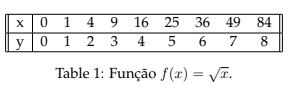



> Prezados alunos. Houve um erro de digitação na tabela. Na última coluna, primeira linha, tem-se 64 no lugar de 84.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
x = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64])
y = np.array([0, 1, 2, 3,  4,  5,  6,  7,  8])

f = lambda x: np.sqrt(x)

# Questão 1

Na mesma figura, apresente o gráfico do polinômio $p_8$ que interpola os nove pontos tabelados, do polinômio linear por partes $Π_1$ e o gráfico da função `np.sqrt` da biblioteca numpy para $x ∈ [1, 64]$. Qual
entre $p_8$ e $Π_1$ apresenta a melhor aproximação de $f(x) = \sqrt{x}$ para $x ∈ [1, 64]$?

Primeiro, calculei os nós de Chebyshev e visualizei como eles se posicionam em $f(x)$

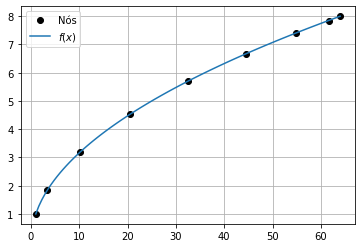

In [3]:
# Grau do polinômio
n = 8

# Nós de Chebyshev
a, b = 1, 64
k = np.arange(n+1)
x = (a+b)/2 - ((b-a)/2)*np.cos(k*np.pi/n)
y = f(x)
plt.plot(x,y,'ok',label="Nós")

# Função
t = np.linspace(a,b,101)
plt.plot(t,f(t),label=r"$f(x)$")

plt.legend()
plt.grid()
plt.show()

Em seguida, calculei o polinômio interpolador $p_8$ a partir dos nós e plotei o polinômio com a função no mesmo gráfico.

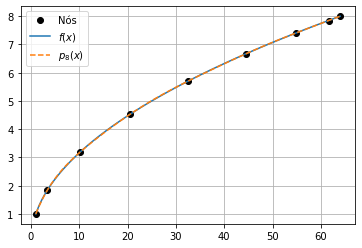

In [4]:
# Polinômio interpolador
p = interpolate.KroghInterpolator(x,y)

plt.plot(x,y,'ok',label="Nós")
plt.plot(t,f(t),label=r"$f(x)$")
plt.plot(t,p(t),'--',label=r"$p_{%d}(x)$" % n)
plt.grid()
plt.legend()
plt.show()

Finalmente, calculei o polinômio linear por partes $\Pi_1$ a partir dos nós. O resultado pode ser visualizado no gráfico a seguir, que compara as interpolações $p_8$ e $\Pi_1$ com $f(t)$.

A diferença entre as interpolações é pequena, mas, observando o intervalo $x \in [0,10]$, $p_8$ aparenta ter se aproximado mais da função alvo.

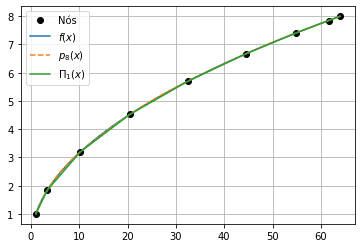

In [5]:
# Polinômio interpolador linear por partes
pp = interpolate.interp1d(x,y, fill_value="extrapolate")

plt.plot(x,y,'ok',label="Nós")
plt.plot(t,f(t),label=r"$f(x)$")
plt.plot(t,p(t),'--',label=r"$p_{%d}(x)$" % n)
plt.plot(t,pp(t),label=r"$\Pi_1(x)$")
plt.grid()
plt.legend()
plt.show()

Comparando o valor máximo do erro, o pensamento é confirmado. Enquanto $\Pi_1$ apresenta erro máximo $0.090$, o valor de $p_8$ é $0.023$.

In [6]:
print("Erro  p8: %2.3f" % np.max(np.abs(f(t)-p(t))))
print("Erro Pi1: %2.3f" % np.max(np.abs(f(t)-pp(t))))

Erro  p8: 0.023
Erro Pi1: 0.090


Compondo, ainda, o gráfico do Erro Absoluto de cada interpolação em relação à função alvo $f(x)$, confirmei novamente que $p_8$ é uma melhor aproximação.

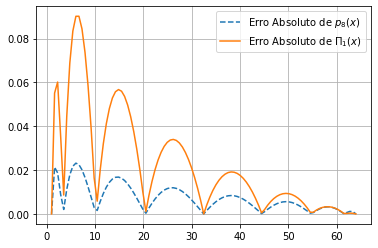

In [7]:
plt.plot(t,np.abs(p(t)  - f(t)),'--',label=r"Erro Absoluto de $p_{%d}(x)$" % n)
plt.plot(t,np.abs(pp(t) - f(t)),label=r"Erro Absoluto de $\Pi_1(x)$")
plt.grid()
plt.legend()
plt.show()

# Questão 2

Apresente um majorante para os erros das aproximações da função $f(x) = \sqrt{x}$ pelo polinômio interpolador $p_8$ e o polinômio interpolador linear por partes $Π_1(x)$ para $x ∈ [1, 64]$. Os majorantes refletem os gráficos da
questão anterior?

Da questão anterior, já temos os valores $M_{p_8} = 0.023$ e $M_{\Pi_1} = 0.090$ como majorantes das interpolações.

In [8]:
Mp = 0.023
Mpp = 0.090

A visualização da área de aceitabilidade das funções de interpolação (considerando o respectivo majorante) em comparação com $f(x)$ é confusa. Como os valores são pequenos, não é possível visualizar bem. Dessa forma, embora pareça que os majorantes limitem o erro da interpolação, não é possível confirmar isso.

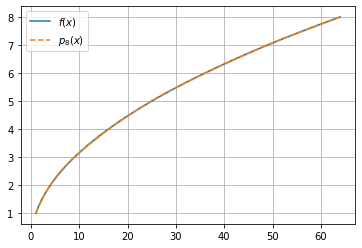

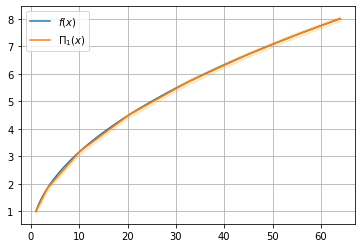

In [9]:
plt.plot(t,f(t),label=r"$f(x)$")
plt.plot(t,p(t),'--',label=r"$p_{%d}(x)$" % n)
plt.fill_between(t, (p(t)-Mp), (p(t)+Mp), color='orange', alpha=.2)

plt.grid()
plt.legend()
plt.show()

plt.plot(t,f(t),label=r"$f(x)$")
plt.plot(t,pp(t),label=r"$\Pi_1(x)$")
plt.fill_between(t, (pp(t)-Mpp), (pp(t)+Mpp), color='orange', alpha=.2)

plt.grid()
plt.legend()
plt.show()

Então, plotei o erro de cada interpolação e a área limitada pelo respectivo majorante. Por meio desse gráfico, confirmei que os majorantes refletem os gráficos da questão anterior.

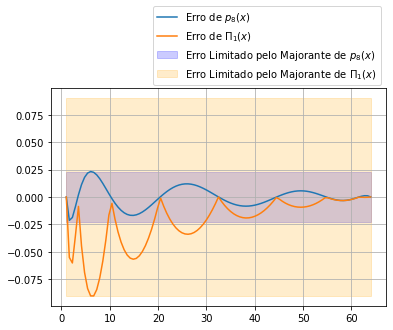

In [10]:
plt.plot(t,p(t) - f(t),label=r"Erro de $p_{%d}(x)$" % n)
plt.fill_between(t, -Mp, Mp, color='b', alpha=.2, label=r"Erro Limitado pelo Majorante de $p_{%d}(x)$" % n)
plt.plot(t,pp(t) - f(t),label=r"Erro de $\Pi_1(x)$")
plt.fill_between(t, -Mpp, Mpp, color='orange', alpha=.2, label=r"Erro Limitado pelo Majorante de $\Pi_1(x)$")

plt.grid()
plt.legend(bbox_to_anchor =(1, 1.4))
plt.show()


# Questão 3

Na mesma figura, apresente o gráfico do polinômio interpolador $p_8$, do polinômio linear por partes $Π_1$ e o gráfico da função `np.sqrt` da biblioteca numpy mas agora para $x ∈ [0, 1]$. Qual entre $p_8$ e $Π_1$ apresenta a melhor aproximação de $f(x) = \sqrt{x}$ para $x ∈ [0, 1]$?

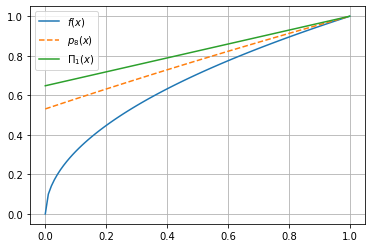

In [11]:
t2 = np.linspace(0,1,101)

plt.plot(t2,f(t2),label=r"$f(x)$")
plt.plot(t2,p(t2),'--',label=r"$p_{%d}(x)$" % n)
plt.plot(t2,pp(t2),label=r"$\Pi_1(x)$")
plt.grid()
plt.legend()
plt.show()

Plotei $f(x)$ e as interpolações para $x \in [0,1]$. O resultado, mostrado no gráfico, demonstra que o comportamento permanece: $p_8$ apresenta uma aproximação de $f(x)$ melhor que $\Pi_1$, uma vez que, para todo $x$ no intervalo, o erro de $p_8$ é menor ou igual ao erro de $\Pi_1$.

Contudo, é importante destacar que o intervalo corresponde a uma extrapolação, em que se espera que o erro seja maior. Ainda, por definição, a interpolação polinomial por partes não é definida fora do intervalo $[x_0, x_n]$ de forma que o resultado foi estimado a partir da seção $[x_0, x_1]$.